In [1]:
from math import sqrt
from random import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sim_bunch(prob): # prob is the per-bunch event probability
    return random()<prob  # return True if there was an event this bunch. This simulates the physics, the actual source of the randomness.
        

In [3]:
def sim_run(n_bunches, prescaling,prob): # we simulate n_bunches bunches, recording how often the trigger fired, and how often the pretrigger fired.
    prescaler=prescaling/2 # we preload to eliminate bias. Often not done.
    triggers=0
    accepted_triggers=0;
    for i in range(n_bunches):
        trig=sim_bunch(prob) 
        if trig: # so the 1st level trigger fired. 
            triggers+=1  # we count up the total of triggeres here, but we don't need to.
            prescaler+=1 # A trigger is fed into the prescaler. Let's see what happens
            if prescaler==prescaling: # This simulates the prescaling counter.  Did this trigger pass the prescaling? 
                #(I.e, does the prescaler overflow?
                prescaler=0 # Yes, so reset counter
                accepted_triggers+=1 # and we accepted that event, it would be saved. Count up the accepted counter.           
    return triggers, accepted_triggers #note that accepted_triggers is calculated without the knowledge of triggers. 

In [4]:
# Let's simulate one run, with a million bunches, and 1% trigger prob, and 10 prescaling:
triggers,accepted_triggers=sim_run(1000000,10, 0.01)
print ("Running the experiment once, the electronics fired",triggers,"times. We read out the detectors",accepted_triggers,"times")


Running the experiment once, the electronics fired 10075 times. We read out the detectors 1008 times


In [5]:
#Let's  do it a 100 times (takes about 10 seconds) Increase to 1000 if you have the time.
trig=[]
acc_trig=[]
for i in range(100):
    triggers,accepted_triggers=sim_run(1000000,10, 0.01)
    trig.append(triggers)
    acc_trig.append(accepted_triggers)

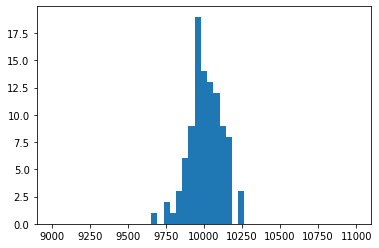

In [7]:
bins=np.linspace(9000, 11000, num=50)
bins_acc=np.linspace(900, 1100, num=50)

d=plt.hist(trig,bins)

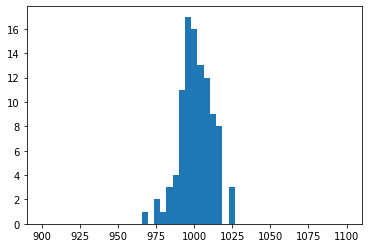

In [9]:
d=plt.hist(acc_trig,bins_acc) #notice the scale. The standard deviation is clearly not 30.

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  2.,  1.,  3.,  4., 11., 17., 16., 13.,
        12.,  9.,  8.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 9000.        ,  9040.81632653,  9081.63265306,  9122.44897959,
         9163.26530612,  9204.08163265,  9244.89795918,  9285.71428571,
         9326.53061224,  9367.34693878,  9408.16326531,  9448.97959184,
         9489.79591837,  9530.6122449 ,  9571.42857143,  9612.24489796,
         9653.06122449,  9693.87755102,  9734.69387755,  9775.51020408,
         9816.32653061,  9857.14285714,  9897.95918367,  9938.7755102 ,
         9979.59183673, 10020.40816327, 10061.2244898 , 10102.04081633,
        10142.85714286, 10183.67346939, 10224.48979592, 10265.30612245,
        10306.12244898, 10346.93877551, 10387.75510204, 10428.57142857,
        10469.3877551 , 10510.20408163, 10551.02040816, 10591.83673469,
 

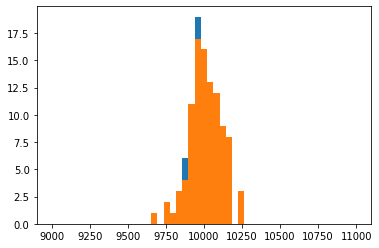

In [10]:
#let's scale up our accepted triggers to estimate the real triggers -> multiply by 10
est_trig=np.array(acc_trig)*10
plt.hist(trig,bins)
plt.hist(est_trig,bins)

In [12]:
#Let's calculate the mean and std.dev
print ("Triggers: ",np.mean(trig),"+-",np.std(trig))
print ("Accepted triggers: ",np.mean(acc_trig),"+-",np.std(acc_trig))
print ("Estimated Triggers: ",np.mean(est_trig),"+-",np.std(est_trig))
#note that we do not need to know the number of real triggers to estimate them very closely,
#with essentially the same std. dev as if we would have collected all


Triggers:  10010.74 +- 106.75866428538716
Accepted triggers:  1001.11 +- 10.671358863799867
Estimated Triggers:  10011.1 +- 106.71358863799868


In [ ]:
#exercise: This is for a deterministic prescaler. What would change for a non-deterministic prescaler?
